## 튜토리얼

In [ ]:
# 이걸 실행해야 데이터에 접근이 가능함
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# 여긴 그냥 기본
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

# 시계열 분석 관련
from scipy.stats import norm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

# 랜덤 포레스트 관련
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 교차검증 관련
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Practice1(Mushroom)

In [ ]:
import urllib.request as req

local = 'mushroom.csv'

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
req.urlretrieve(url, local)

('mushroom.csv', <http.client.HTTPMessage at 0x7f9002503cd0>)

In [ ]:
mr = pd.read_csv('mushroom.csv', header=None)

label = []
data = []
attr_list = []

for index, row in mr.iterrows():
  label.append(row.ix[0])
  row_data = []
  for v in row.ix[1:]:
    row_data.append(ord(v))
  data.append( row_data)

d_train, d_test, l_train, l_test = train_test_split( data, label)

clf = RandomForestClassifier()
clf.fit( d_train, l_train)

pre = clf.predict( d_test)

score = metrics.accuracy_score
reoport = metrics.classification_report( l_test, pre)

print(scipy)
print( report)

AttributeError: ignored

##Practice2(Mushroom)

In [ ]:
import urllib.request as req

local = 'mushroom.csv'

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
req.urlretrieve(url, local)

mr = pd.read_csv('mushroom.csv', header=None)

In [ ]:
mr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
# 2. 데이터 내부의 기호를 숫자로 변환
label = []
data = []
attr_list = []

# iterrows : 행에 반복적으로 접근하면서 값을 조작할 때 사용
# enumerate와 같은 개념으로 index랑 각각의 열을 뽑아줌줌
for row_index, row in mr.iterrows():
  # 라벨(독 여부) 생성
  label.append(row.loc[0])
  row_data = []
    
  # 나머지를 데이터로
  # loc :dataframe 내 해당 row나 column을 찾을 때 사용
  for v in row.loc[1:]:
    # ord() : 특정한 한 문자를 아스키 코드 값으로 변환
    row_data.append(ord(v))
    
  data.append(row_data)

In [ ]:
# 3. 학습전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

In [ ]:
# 4. 데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

RandomForestClassifier()

In [ ]:
# 5. 데이터 예측하기
predict = clf.predict(data_test)
predict

array(['e', 'e', 'p', ..., 'e', 'p', 'e'], dtype='<U1')

In [ ]:
# 6. 결과 테스트하기
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)

print('정답률 = ', ac_score)
print('리포트 = \n', cl_report)

정답률 =  1.0
리포트 = 
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1050
           p       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Real Analysis

In [ ]:
df = pd.read_csv('/gdrive/My Drive/DS_contest/data1.csv', header=None)

In [ ]:
df = df.drop([df.index[0]]).reset_index()
df = df.drop(['index'], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.0,0,0,354,3323,3298,15384,10746,0.583086681,0.5207013429999999,0.202392788,1,1197.61,66.53,3214.7,178.59,18,1249.6,73.5,1148.37,3248.3,2.57,0.96,0,0,40.0,35.48,638.7,638.7,558.91,99580.58333
1,1.0,1,1,372,3073,3054,20167,10440,1.059931507,0.402927322,0.242268801,6,4212.32,117.01,9727.2,270.2,36,2711.9,77.41,1604.27,11438.43,3.59,1.55,0,1,60.0,13.8,496.97,496.97,3715.35,82942.66667
2,2.0,2,2,383,3318,3291,18832,10745,1.913723219,0.35115139700000003,0.27438054,5,5131.4,95.03,52997.8,981.44,54,2275.37,42.88,914.98,52997.8,23.29,2.26,1,2,55.0,95.03,5131.4,0.0,5131.4,55833.66667000001
3,3.0,3,3,395,3220,3188,20243,10884,0.185480944,0.231013853,0.305237294,5,3044.0,49.9,42791.76,701.5,61,2687.2,43.04,0.0,51059.6,15.92,1.13,1,3,55.0,49.9,3044.0,0.0,3044.0,95592.08333
4,4.0,4,4,397,3220,3189,19085,10916,0.432909605,0.214300955,0.306794685,5,5374.0,99.52,50769.92,940.18,54,2351.45,42.7,0.0,53236.05,21.59,2.29,1,3,55.0,99.09,5351.0,0.0,5374.0,104730.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,275.0,275,275,708,3048,3027,19462,10351,0.061657033,0.368939369,0.543000246,5,6209.34,159.21,44935.3,1152.19,39,2652.6,67.2,4400.06,44689.46,16.94,2.34,1,3,55.0,159.21,6209.34,0.0,6209.34,43417.0
276,276.0,276,276,716,3081,3057,20932,10036,0.8395765470000001,0.399107114,0.587986921,6,4802.42,160.08,8484.65,282.82,30,3127.69,106.22,1798.36,8480.5,2.71,1.54,1,2,55.0,160.08,4802.42,0.0,4802.42,46754.0
277,277.0,277,277,718,3083,3057,20276,10112,0.342465753,0.423411187,0.546300251,4,4395.3,122.09,15000.7,416.69,36,2902.23,81.84,142.32,15000.72,5.17,1.51,1,2,55.0,122.09,4395.3,0.0,4395.3,20921.0
278,278.0,278,278,720,3036,3019,20728,10218,1.203389831,0.411507402,0.549214689,4,4422.9,126.37,9565.0,273.29,35,2904.09,81.9,1195.02,9565.0,3.29,1.52,1,2,55.0,126.37,4422.9,0.0,4422.9,56508.16667000001


In [ ]:
# 2. 데이터 내부의 기호를 숫자로 변환
label = []
data = []
attr_list = []

# iterrows : 행에 반복적으로 접근하면서 값을 조작할 때 사용
# enumerate와 같은 개념으로 index랑 각각의 열을 뽑아줌
for row_index, row in df.iterrows():
  # 라벨 생성
  label.append(row.loc[30])
  row_data = []
    
  # 나머지를 데이터로
  # loc :dataframe 내 해당 row나 column을 찾을 때 사용
  for v in row.iloc[4:30]:
    # ord() : 특정한 한 문자를 아스키 코드 값으로 변환
    row_data.append(v)
    
  data.append(row_data)

In [ ]:
# 3. 학습전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

In [ ]:
# 4. 데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

RandomForestClassifier()

In [ ]:
# 5. 데이터 예측하기
predict = clf.predict(data_test)
predict

array(['58587.33333', '67178.16667', '70951.58333', '40846.08333',
       '184715.4167', '91298.08333', '116210.25', '91298.08333',
       '41685.41667', '121095.1667', '35681.08333', '56161.5',
       '57193.58333', '26307.66667', '63664.08333', '29322.66667',
       '89838.16667', '43469.08333', '116210.25', '122509.25',
       '193890.1667', '49757.75', '121539.25', '113469.25', '156489.8333',
       '58749.5', '201978.6667', '93870.16667', '33732.83333', '68223.25',
       '126861.75', '44344.33333', '58294.16667000001', '64624.08333',
       '101547.0', '91581.5', '44901.75', '136040.3333', '26307.66667',
       '91581.5', '90746.58333', '29281.75', '156489.8333', '89809.33333',
       '25264.66667', '25616.08333', '176148.0833', '79126.58333',
       '70951.58333', '201978.6667', '109641.75', '90746.58333',
       '121095.1667', '42373.16667', '81958.0', '110092.25', '73793.5',
       '85081.0', '58240.08333', '29322.66667', '34269.91667',
       '48548.83333', '41391.41667', '59

In [ ]:
P = np.array(predict)
L = np.array(label_test)

P = P.astype(np.float)
L = L.astype(np.float)

In [ ]:
def smape(A, F):
  n = len(A)
  sum = 0
  for i in range (n):
    sum += np.abs(F[i] - A[i]) / (np.abs(A[i]) + np.abs(F[i]))
  return 200/n*sum

def sMAPE(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [ ]:
# 6. 결과 테스트하기
print(smape(L, P))
print(sMAPE(L, P))

45.156329610290804
45.1563296102908


## 교차검증 그런데 잘 모르겠다

In [ ]:
data_train_array = np.array(data_train)

In [ ]:
label_train_array = np.array(label_train)

In [ ]:
x = pd.DataFrame(data_train_array)
y = pd.DataFrame(label_train_array)

In [ ]:
y.head()

,0
0,55952.25
1,68346.83333
2,20238.25
3,72925.91667
4,56161.5


In [ ]:
kfold = KFold(n_splits=5, shuffle = True, random_state = 0)
scores = cross_val_score(clf, x, y, cv=kfold)
print('cross-val-score: {}'.format(scores))
print('cross-val-score.mean: {:.3f}'.format(scores.mean()))

cross-val-score: [0. 0. 0. 0. 0.]
cross-val-score.mean: 0.000


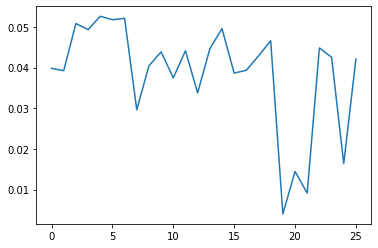

In [ ]:
importance = clf.feature_importances_
plt.plot(importance)